# <center>Medical Insurance Cost Prediction</center>

Health is wealth. A healthy life is a wealthy life but a healthy life could also mean spending money in the hospital. This could be an insurance charge in case a disease confines a person to the beds in the wards of an hospital. No one envisages an health condition or emergency but these things could happen and it is vital to be ready to pay for the costs that comes with an such emergencies. 

Before an insurance charge is issued to a beneficiary, details such as smoking status and age are usually collected. This is because smokers have a high probability of having a health issue in the future and would need to pay more than the average non-smoker. Also, old people are likely to have health issues, hence the need for them to pay more in order to cover the future health expenses.


<img src='medicaldebt.jpg' width = '500' >

# About Dataset

### Columns

<b>age</b>: The age column shows the age of primary beneficiary

<b>sex</b>: insurance contractor gender, female, male

<b>bmi</b>: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

<b>children</b>: Number of children covered by health insurance / Number of dependents

<b>smoker</b>: The column give information about the beneficiary's smoking status

<b>region</b>: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.



## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.neighbors import KNeighborsRegressor

## Loading Dataset

In [2]:
df = pd.read_csv('insurance.csv')

## Exploratory Data Analysis

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.shape

(1338, 7)

In [5]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


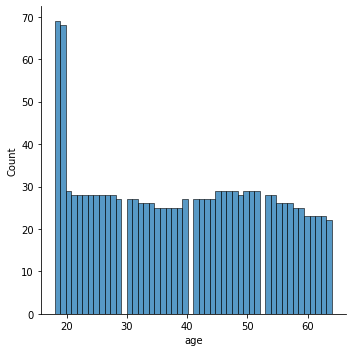

In [9]:
sns.displot(df['age'], bins = 50)

The histogram aboveshows that there are more records of beneficiaries between ages 18-20

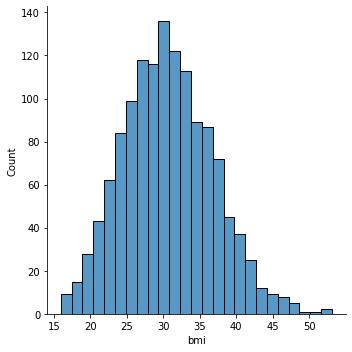

In [10]:
sns.displot(df['bmi'])

The histogram of the bmi above shows that most people are within the standard bmi limits with few outliers. This could be as a result of a medical condition

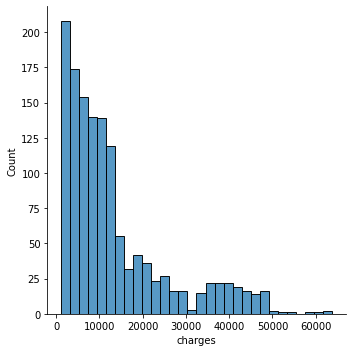

In [11]:
sns.displot(df['charges'])

This is interesting!

The histogram above is left-skewed. Only a few persons pay so high for insurance while many people pay below about $15000 

<AxesSubplot:xlabel='sex', ylabel='count'>

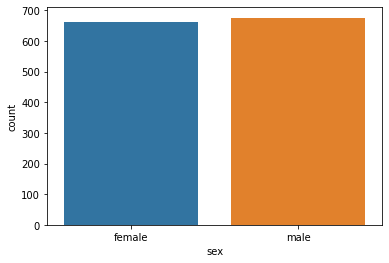

In [12]:
sns.countplot(x = 'sex', data = df);

This dataset consists of almost the same number of males and females


## Questions

1) Do you think men smoke more?

2) Is there a correlation between bmi and age

3) Is there a correlation between bmi and charges

4) Do you young people smoke more often than older people


Let's explore further to answer the questions

<AxesSubplot:xlabel='children', ylabel='count'>

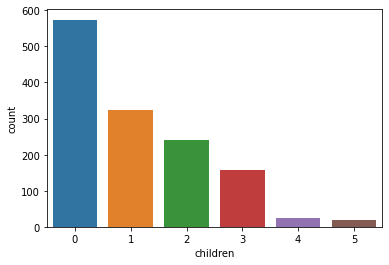

In [13]:
sns.countplot(x = 'children', data = df);

This means that most people in this data set are single or do not have children

Earlier, we detected that there are more people within the ages 18 - 19. 

This is logical 

If there are more single people, they would definitely not have children at that time


<AxesSubplot:xlabel='smoker', ylabel='count'>

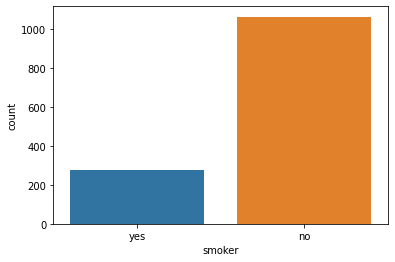

In [14]:
sns.countplot(x = 'smoker', data = df);

We have more non - smokers in this dataset


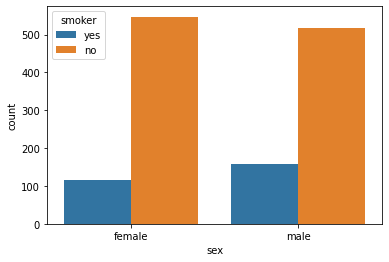

In [15]:
sns.countplot(x = 'sex', data = df, hue = 'smoker');

The blue bar for males is higher than the blue bar for females. This means we have a higher proportion of males smokers in this dataset



<AxesSubplot:xlabel='region', ylabel='count'>

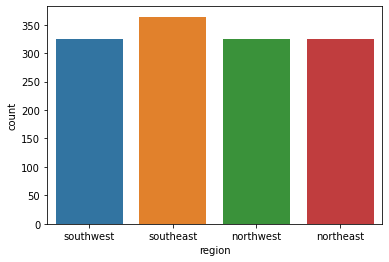

In [16]:
sns.countplot(x = 'region', data = df);

This shows that almost the same number of records were taken for each region

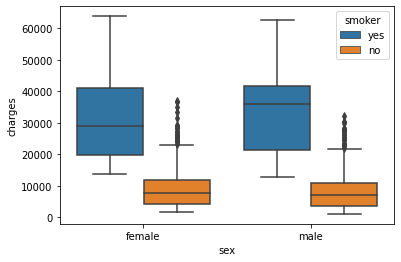

In [17]:
sns.boxplot(x = 'sex', y = 'charges' , data = df, hue = 'smoker');

Amazing!

This shows that we have a lot of people who smoke and pay more for insurance charges

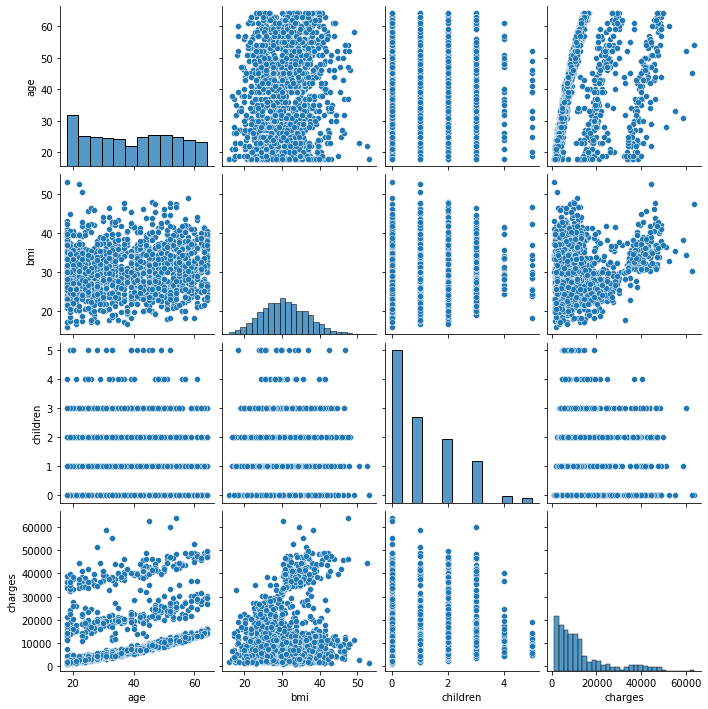

In [18]:
sns.pairplot(df);

There is no visible correlation between the features in the pairplot above but we could deduce more insights from the data by using an hue

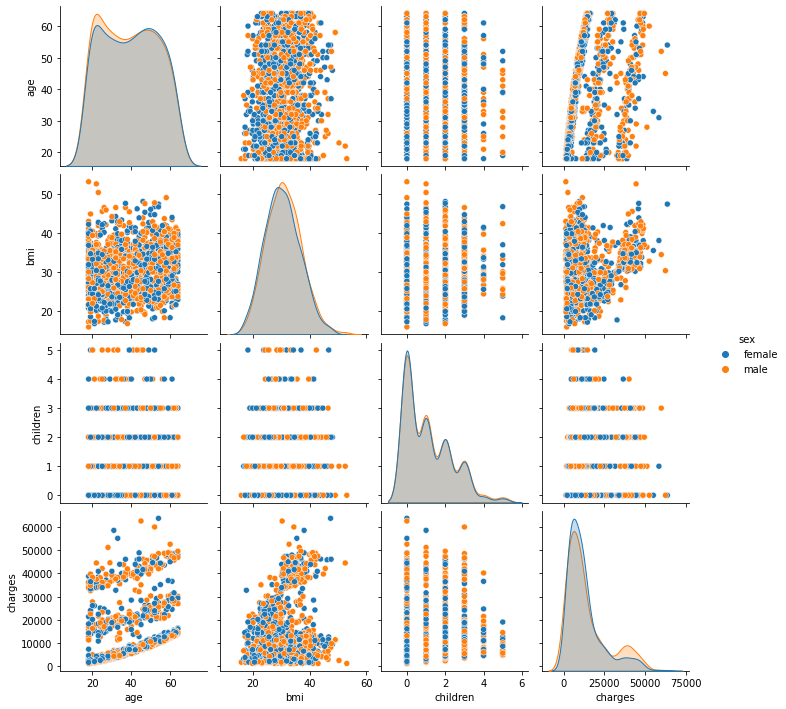

In [19]:
sns.pairplot(df, hue = 'sex');

Using an hue of sex in the pairplot above does not give us a substantial information

Let's use an hue of smoker to explore further

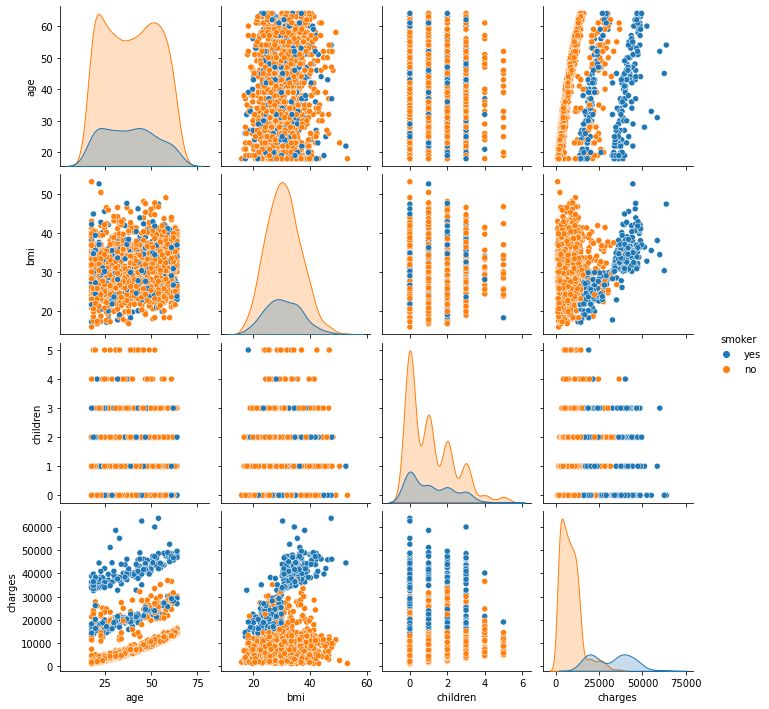

In [20]:
sns.pairplot(df, hue = 'smoker');

The pairplot above tells us that Smokers are likely to pay more insurance charges generally


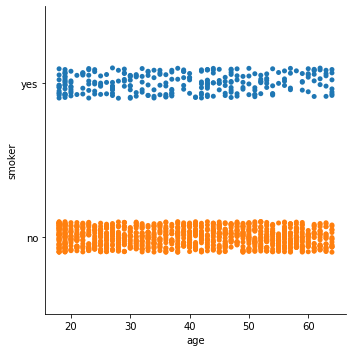

In [21]:
sns.catplot(x = 'age', y = 'smoker', data = df);

From the above plot, there are smokers across all ages

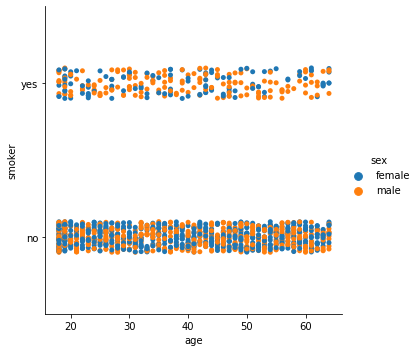

In [22]:
sns.catplot(x = 'age', y = 'smoker', data = df, hue = 'sex');

The categorical plot also shows that there are smokers across all ages and the gender doesn't matter

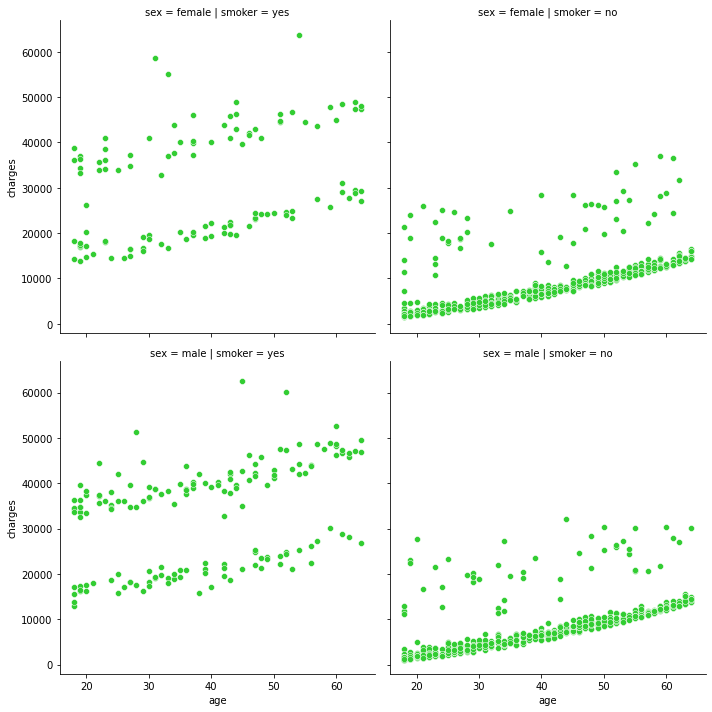

In [23]:
sns.relplot(x = 'age', y = 'charges', data =df, col = 'smoker', row = 'sex', color = 'limegreen');

The plot above splits the smoking status and gender into two rows each

In the first row, it can be gleaned that more female smokers paid higher insurance charges than the non smokers. Also, as the age increases there is an upward change in charges too. Obviously, it is expected that old people would pay more than the younger folks.

The same thing is applicable in the second row for males. 

Conclusively, this means an increase in charges is relative to increase in age and positive smoking status

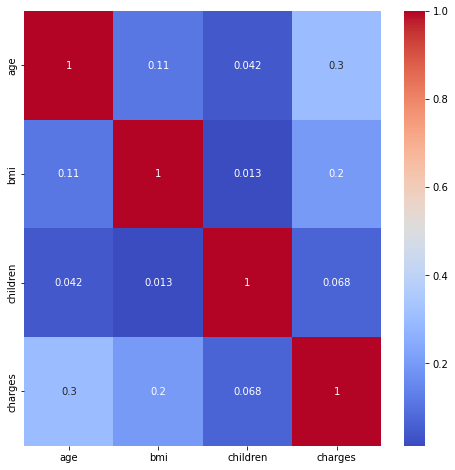

In [24]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm');

Let's analyse our beautiful heat map above

The heat map shows that numerical features have little or no significant correlation with each other

Looking at the last row in the heat map, it is observed that age and bmi have quite a high correlation with charges. 

We explored the dataset earlier and the heatmap confirms some assumptions such as

1) The older a person, an increase in charges is very likely

2) The bmi could have a little influence of the charges and this could be due to a medical condition where the bmi is not normal compared to the average bmi 

# Creating the Model

The sex and smoker columns are non-numeric(categorical) features. The machine learning algorithm will not work if we pass in a non-numeric value.

So lets tranform!

A label encoder helps us to transform categorical features into numeric values. For example in the sex column, we need the male and female values with numeric values. E.g 0 and 1

In [25]:
le = LabelEncoder()

In [26]:
df['Sex'] = le.fit_transform(df['sex'])

In [27]:
df['Smoker'] = le.fit_transform(df['smoker'])

In [28]:
df['Region'] = le.fit_transform(df['region'])

In [29]:
df.head()

,age,sex,bmi,children,smoker,region,charges,Sex,Smoker,Region
0,19,female,27.900,0,yes,southwest,16884.92400,0,1,3
1,18,male,33.770,1,no,southeast,1725.55230,1,0,2
2,28,male,33.000,3,no,southeast,4449.46200,1,0,2
3,33,male,22.705,0,no,northwest,21984.47061,1,0,1
4,32,male,28.880,0,no,northwest,3866.85520,1,0,1


In [30]:
#dropping redundant columns
cols_to_drop = ['sex','smoker','region']
df = df.drop(cols_to_drop, axis = 1)
df.head()

,age,bmi,children,charges,Sex,Smoker,Region
0,19,27.900,0,16884.92400,0,1,3
1,18,33.770,1,1725.55230,1,0,2
2,28,33.000,3,4449.46200,1,0,2
3,33,22.705,0,21984.47061,1,0,1
4,32,28.880,0,3866.85520,1,0,1


## Splitting Dataset

In [31]:
X = df.drop('charges', axis = 1)
y = df['charges']

In [32]:
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

In [34]:
X_train, X_test, y_train,y_test = train_test_split(X_scaled,y,test_size = 0.25, random_state = 42)

#### Training and Testing Algorithms

In [35]:
model_results = pd.DataFrame(columns=["Model", "R2 Score"])

In [36]:
models = [("Linear Regression", LinearRegression()), 
          ("Random Forest", RandomForestRegressor(random_state=101)),
          ("LightGBM", LGBMRegressor(random_state=101)),
          ("XGBoost", XGBRegressor(random_state=101)), 
          ("Adaboost Classifier", AdaBoostRegressor(base_estimator=DecisionTreeRegressor(),random_state = 101)),
          ("Decision Tree", DecisionTreeRegressor(random_state=101, max_depth =3)),
          ("CatBoost", CatBoostRegressor(verbose = False,random_state = 101)),
          ("KNN", KNeighborsRegressor()),
          ("Gradient Boosting", GradientBoostingRegressor(random_state = 101))]
          

In [37]:
for model_name, model in models:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    r2_val = r2_score(y_test,predictions)
    mse = mean_squared_error(y_test,predictions)
    
    new_row = {"Model": model_name, "R2 Score" : r2_val}
    model_results = model_results.append(new_row, ignore_index=True)

In [38]:
model_results.sort_values(by="R2 Score", ascending=False)

,Model,R2 Score
8,Gradient Boosting,0.860425
6,CatBoost,0.857118
1,Random Forest,0.851497
2,LightGBM,0.851243
4,Adaboost Classifier,0.843053
5,Decision Tree,0.833513
7,KNN,0.829884
3,XGBoost,0.822697
0,Linear Regression,0.766891


In [39]:
params = {"min_samples_split": [8,10,12],
                  "n_estimators" : [20,50,80,100,150],
                  "max_depth" : [2,3,4],
                  "random_state" : [42]}

grid_gb = GridSearchCV(estimator = GradientBoostingRegressor(), param_grid = params, cv=5, verbose=0, n_jobs=-1)

grid_gb.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [20, 50, 80, 100, 150],
                         'random_state': [42]})

In [40]:
grid_gb.best_params_

{'max_depth': 2,
 'min_samples_split': 12,
 'n_estimators': 100,
 'random_state': 42}

In [41]:
tuned_params = grid_gb.best_params_
gb = GradientBoostingRegressor(**tuned_params)
gb.fit(X_train, y_train)
predictions = gb.predict(X_test)

In [42]:
print("R2 Score:", r2_score(y_test,predictions))

R2 Score: 0.8636294876009623


Our best model for predicting the insurance charges is the gradient boosting regressor